## Step 1: Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Step 2 : Loading dataset

In [2]:
import os
working_directory = os.getcwd()
path  = working_directory + '/weatherAUS.csv'
df = pd.read_csv(path)



In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.shape

(145460, 24)

## Step 3 : Data Cleaning

In [5]:
df.groupby("Location")["Location"].agg("count")

Location
Adelaide            3193
Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale                3009
SalmonGums          3001
Sydney              3344
SydneyAirport       3009
Townsville      

In [6]:
df.groupby("Date")["Date"].agg("count")

Date
2007-11-01     1
2007-11-02     1
2007-11-03     1
2007-11-04     1
2007-11-05     1
              ..
2017-06-21    49
2017-06-22    49
2017-06-23    49
2017-06-24    49
2017-06-25    48
Name: Date, Length: 3436, dtype: int64

## Step 4 : Dropping the other variables

#### Since we are developing a model to predict the Tomorrow's rain based on average relative humdity and pressure aspects we drop the other variables. 

In [7]:
df1=df.drop(["Date" , "Location","MinTemp", "MaxTemp" , "Rainfall" , "Evaporation" , "Sunshine" , "WindGustDir" ,"WindGustSpeed" ,"WindDir3pm" , "WindSpeed9am" , "WindSpeed3pm"  ,"WindDir9am" ,"Cloud9am" , "Cloud3pm"  , "Temp9am" , "Temp3pm" , "RISK_MM" ],axis="columns")
df1.head()

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,71.0,22.0,1007.7,1007.1,No,No
1,44.0,25.0,1010.6,1007.8,No,No
2,38.0,30.0,1007.6,1008.7,No,No
3,45.0,16.0,1017.6,1012.8,No,No
4,82.0,33.0,1010.8,1006.0,No,No


In [8]:
df1.shape

(145460, 6)

In [9]:
df1.isnull().sum()

Humidity9am      2654
Humidity3pm      4507
Pressure9am     15065
Pressure3pm     15028
RainToday        3261
RainTomorrow     3267
dtype: int64

In [10]:
df1.dtypes[df1.dtypes!= "object"]

Humidity9am    float64
Humidity3pm    float64
Pressure9am    float64
Pressure3pm    float64
dtype: object

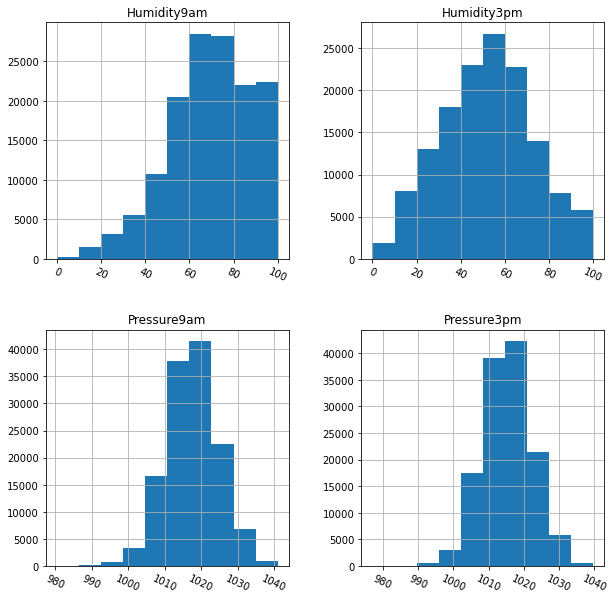

In [11]:
df1.hist(figsize=(10,10), xrot=-25)
plt.ticklabel_format(style='plain')


## Step 4: Dropping Null values 

### As the null value count is significatnly lower than compared to the overall available values we decide to ince the null values are scares we drop the same


In [12]:
df2 = df1.dropna()
df2.shape

(124412, 6)

In [13]:
df2.head()

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,71.0,22.0,1007.7,1007.1,No,No
1,44.0,25.0,1010.6,1007.8,No,No
2,38.0,30.0,1007.6,1008.7,No,No
3,45.0,16.0,1017.6,1012.8,No,No
4,82.0,33.0,1010.8,1006.0,No,No


In [14]:
df2.isnull().sum()

Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
RainToday       0
RainTomorrow    0
dtype: int64

## Step 5 : Taking averages of Humidity and Pressures respectively for a given day 


In [15]:
df2["Humidity"] = ((df2["Humidity9am"]+ df2["Humidity3pm"])/2)
df2.head()

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,Humidity
0,71.0,22.0,1007.7,1007.1,No,No,46.5
1,44.0,25.0,1010.6,1007.8,No,No,34.5
2,38.0,30.0,1007.6,1008.7,No,No,34.0
3,45.0,16.0,1017.6,1012.8,No,No,30.5
4,82.0,33.0,1010.8,1006.0,No,No,57.5


In [16]:
df2["Pressure"] = ((df2["Pressure9am"]+ df2["Pressure9am"])/2)
df2.head()

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,Humidity,Pressure
0,71.0,22.0,1007.7,1007.1,No,No,46.5,1007.7
1,44.0,25.0,1010.6,1007.8,No,No,34.5,1010.6
2,38.0,30.0,1007.6,1008.7,No,No,34.0,1007.6
3,45.0,16.0,1017.6,1012.8,No,No,30.5,1017.6
4,82.0,33.0,1010.8,1006.0,No,No,57.5,1010.8


In [17]:
df2.isnull().sum()

Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
RainToday       0
RainTomorrow    0
Humidity        0
Pressure        0
dtype: int64

In [18]:
df2.shape

(124412, 8)

## Step 6 : Droppping the Other Humidity, Pressure and Rain today values 

#### As we got the average humidity and presuure recorded thorughout the day we drop the seperate humdity, pressureand rain today value is also removed ans we are predicting the rain for Tomorrow only

In [19]:
df3=df2.drop(["Humidity9am" , "Humidity3pm","Pressure9am", "Pressure3pm" , "RainToday" ],axis="columns")
df3.head()

,RainTomorrow,Humidity,Pressure
0,No,46.5,1007.7
1,No,34.5,1010.6
2,No,34.0,1007.6
3,No,30.5,1017.6
4,No,57.5,1010.8


## Step 7 : Rearranging the target value to the end for better visualisation 

### Moving Rain toomorrow value to the end of the dataset

In [20]:
cols = df3.columns.tolist()
cols

['RainTomorrow', 'Humidity', 'Pressure']

In [21]:
cols = cols[-1:] + cols[:-1]
cols

['Pressure', 'RainTomorrow', 'Humidity']

In [22]:
cols = cols[-1:] + cols[:-1]
cols

['Humidity', 'Pressure', 'RainTomorrow']

In [23]:
df4 = df3[cols]

df4.head()

,Humidity,Pressure,RainTomorrow
0,46.5,1007.7,No
1,34.5,1010.6,No
2,34.0,1007.6,No
3,30.5,1017.6,No
4,57.5,1010.8,No


## Step 8 : Creating dummies for the Yes and No Variable to convert the dataset into a numeical data set


In [24]:
df4['RainTomorrow'].replace({'No': 1, 'Yes': 2},inplace = True)

df4.head()



,Humidity,Pressure,RainTomorrow
0,46.5,1007.7,1
1,34.5,1010.6,1
2,34.0,1007.6,1
3,30.5,1017.6,1
4,57.5,1010.8,1


In [25]:
df5 = df4.copy()

df5.head()


,Humidity,Pressure,RainTomorrow
0,46.5,1007.7,1
1,34.5,1010.6,1
2,34.0,1007.6,1
3,30.5,1017.6,1
4,57.5,1010.8,1


In [26]:

df5.to_csv('Rain_prediction1.csv', index=False)



In [27]:
import os
working_directory = os.getcwd()
path  = working_directory + '/Rain_Prediction1.csv'
df = pd.read_csv(path)

df.head()

,Humidity,Pressure,RainTomorrow
0,46.5,1007.7,1
1,34.5,1010.6,1
2,34.0,1007.6,1
3,30.5,1017.6,1
4,57.5,1010.8,1
